In [2]:
# Зависимости
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import cluster
from sklearn import datasets

In [3]:
# Сформируем тестовый набор данных из 5000 записей, каждая из которых имеет две координаты.
# При этом полученный набор данных будет иметь 4 явно выраженных кластера.
test_x, test_y = datasets.make_blobs(n_samples = 5000, n_features = 2, centers = 4)

In [4]:
# Приведем полученный набор данных к формату pandas.DataFrame
x = pd.DataFrame(test_x)
print(x)

             0         1
0     3.156758 -3.504492
1    -2.418527 -3.302121
2    -7.020781  4.184789
3     4.730659 -3.630200
4    -3.056262  0.905757
...        ...       ...
4995  3.774078 -4.765550
4996 -6.831534 -6.555650
4997 -9.817023 -5.010626
4998 -8.206154  5.277706
4999  3.146037 -3.713824

[5000 rows x 2 columns]


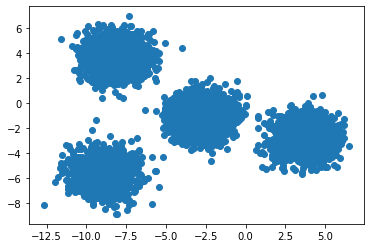

In [5]:
# Отобразим полученный набор данных в виде точек на плоскости
plt.scatter(x[0], x[1])
plt.show()

In [6]:
# Теперь запустим алгоритм k-средних, указав число кластеров, которое нам изначально известно
kmeans = sklearn.cluster.KMeans(n_clusters = 4)
y = kmeans.fit_predict(x)

# Выведем значение инерции (именно оно минимизируется при использовании алгоритма k-средних)
print(kmeans.inertia_)

10011.195533574652


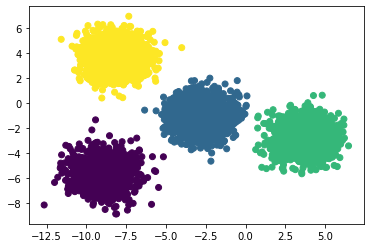

In [7]:
# Отобразим набор данных, используя разные цвета для разных кластеров
plt.scatter(x[0], x[1], c = y)
plt.show()    

In [8]:
# Загрузите файл "worldcities.csv" в DataFrame.
worldcities_dataset = pd.read_csv("worldcities.csv")
worldcities_dataset.head(10)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Malishevë,Malisheve,42.4822,20.7458,Kosovo,XK,XKS,Malishevë,admin,NaN,1901597212
1,Prizren,Prizren,42.2139,20.7397,Kosovo,XK,XKS,Prizren,admin,NaN,1901360309
2,Zubin Potok,Zubin Potok,42.9144,20.6897,Kosovo,XK,XKS,Zubin Potok,admin,NaN,1901608808
3,Kamenicë,Kamenice,42.5781,21.5803,Kosovo,XK,XKS,Kamenicë,admin,NaN,1901851592
4,Viti,Viti,42.3214,21.3583,Kosovo,XK,XKS,Viti,admin,NaN,1901328795
5,Shtërpcë,Shterpce,42.2394,21.0272,Kosovo,XK,XKS,Shtërpcë,admin,NaN,1901828239
6,Shtime,Shtime,42.4331,21.0397,Kosovo,XK,XKS,Shtime,admin,NaN,1901598505
7,Vushtrri,Vushtrri,42.8231,20.9675,Kosovo,XK,XKS,Vushtrri,admin,NaN,1901107642
8,Dragash,Dragash,42.0265,20.6533,Kosovo,XK,XKS,Dragash,admin,NaN,1901112530
9,Podujevë,Podujeve,42.9111,21.1899,Kosovo,XK,XKS,Podujevë,admin,NaN,1901550082


In [9]:
# Сформируйте новый DataFrame из столбцов 'lng' и 'lat' оригинального DataFrame.
dataset = worldcities_dataset.iloc[:, 2:4]
dataset.head(10)

,lat,lng
0,42.4822,20.7458
1,42.2139,20.7397
2,42.9144,20.6897
3,42.5781,21.5803
4,42.3214,21.3583
5,42.2394,21.0272
6,42.4331,21.0397
7,42.8231,20.9675
8,42.0265,20.6533
9,42.9111,21.1899


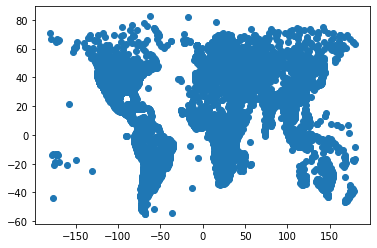

In [10]:
# Отобразите полученный DataFrame в виде точек, где координаты по оси X берутся из столбца 'lng', а координаты по оси Y - из столбца 'lat'.
plt.scatter(dataset['lng'], dataset['lat'])
plt.show()

In [11]:
# Создайте пустой список inertia для хранения результатов вычислительных экмпериментов.
inertia = []

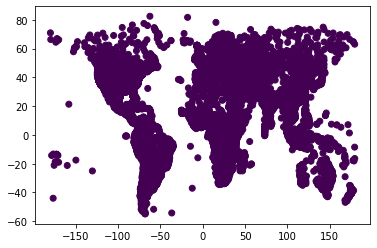

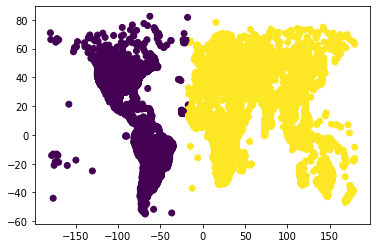

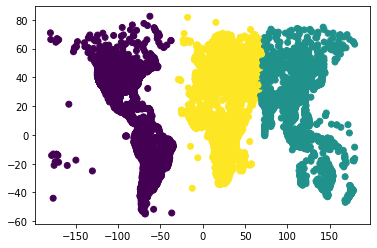

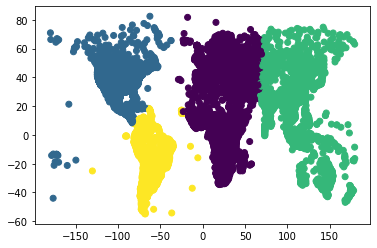

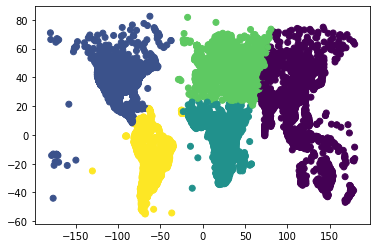

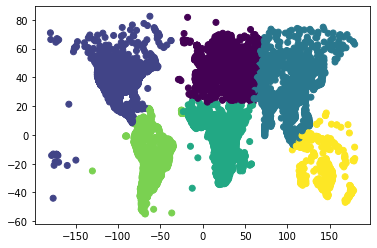

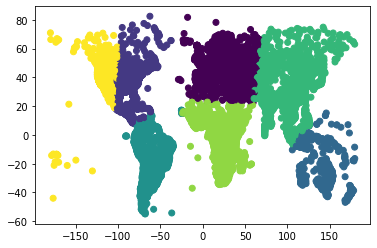

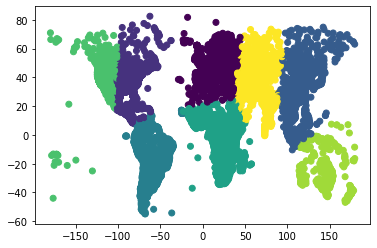

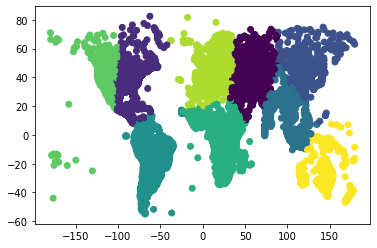

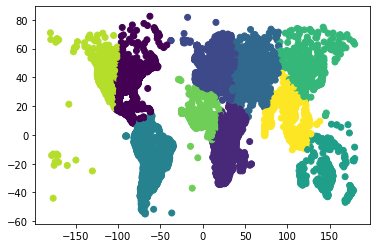

In [12]:
# Напишите цикл по количеству кластеров от 1 до 10.
# В цикле запускайте алгоритм k-средних с текущим количеством кластеров,
# добавляйте в список inertia значение для текущего результата работы алгоритма,
# отобразите набор данных, используя разные цвета для разных кластеров.
# Все шаги делайте по аналогии с примером выше.
for i in range(1,11):
    kmeans = sklearn.cluster.KMeans(n_clusters = i)
    y = kmeans.fit_predict(dataset)
    
    inertia.append(kmeans.inertia_)
    
    plt.scatter(dataset['lng'], dataset['lat'], c = y)
    plt.show() 

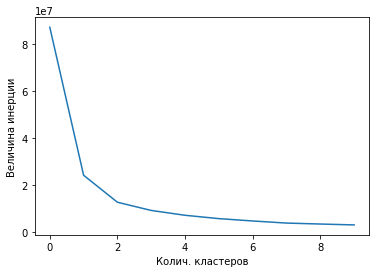

In [13]:
# Постройте график изменения величины inertia от количества кластеров.
plt.plot(inertia)
plt.xlabel('Колич. кластеров')
plt.ylabel('Величина инерции')
plt.show()